![title](UCN_ICI.PNG)

#  <font color= #007FFF> Optimización Multi Objetivo -Compromise Programming</font>

<div class="alert alert-info"> </h4> Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso Electivo: Optimización Multi Objetivo</h4> </div>

En un problema de optimización se tratará de encontrar una solución que represente el valor óptimo para una función objetivo. En el caso tradicional se tendrá un único objetivo y el valor óptimo corresponderá a un mínimo o a un máximo.

Pero en ciencias e ingeniería se dan, en bastantes ocasiones, problemas que requieren la optimización simultánea de más de un objetivo ([optimización multiobjetivo](https://en.wikipedia.org/wiki/Multi-objective_optimization), pero el problema está en que normalmente no existe un elemento de S que produzca un óptimo de forma simultánea para cada uno de los k objetivos que componen las funciones.Esto se deberá a la existencia de conflictos entre objetivos, que harán que la mejora de uno de ellos dé lugar a un empeoramiento de algún otro. Pensemos por ejemplo en el caso de un avión con dos objetivos que fueran su velocidad y el ahorro de combustible: un aumento de la velocidad traería consigo una disminución del ahorro. Habrá que llegar por tanto a una situación de compromiso en la que todos los objetivos sean satisfechos en un grado aceptable, desde el punto de vista de diseño.

A diferencia de los problemas de optimización con un único objetivo, el concepto de óptimo es ahora relativo y será necesario decidir de alguna forma cuál es la mejor solución (o cuáles son las mejores soluciones) al problema.


Para tratar el problema comentado del conflicto entre objetivos se han utilizado diversos métodos:

 - Métodos basados en el concepto de [eficiencia de Pareto](https://es.wikipedia.org/wiki/Eficiencia_de_Pareto)
 - Métodos basados en la combinación de objetivos. 

> El objetivo de este material es introducir a la optimización multi objetivo utilizando Python y Cplex | Python y Gurobi.
Para mayor información puede visitar el siguiente link [Cplex IBM](https://ibmdecisionoptimization.github.io/tutorials/html/Linear_Programming.html)
o [GUROBI](https://www.gurobi.com/es/resource/python-i-webinar/)


##  <font color= #007FFF> Compromise Programming </font>

En el método de restricción ε, una de las funciones objetivo se selecciona para ser optimizado, los otros se convierten en restricciones y el problema obtiene formar:

\begin{equation}
Min\;f_i(x)
\\
s.t \; \; f_j(x)\leq \epsilon_j
\end{equation}

En lo que respecta a la optimización, la solución del problema puede ser demostrado que siempre es óptimo de Pareto débil. Por otro lado, x ∈ S puede ser demostrado ser Pareto óptimo si y solo si resuelve el problem anterior. Además, una solución única se puede demostrar que es Pareto óptimo para cualquier límite superior. En otra
palabras, para garantizar la optimización de Pareto debemos resolver k diferentes problemas (y resolver muchos problemas para cada solución óptima de Pareto aumenta el costo de computación) u obtener una solución única (que no es necesariamente fácil de verificar). Sin embargo, un hecho positivo es que encontrar cualquier solución óptima de Pareto no necesita convexidad. En otras palabras, este método funciona tanto para problemas convexos como no convexos.


### <font color=#007FFF> Modelo de Programación Lineal - Multi Objetivo | Ejemplo: </font>
\begin{equation}
Max\;f_1=2x+3y
\\
Min\;f_2=x+2
\\
s.t
\\
x+y \leq 15 
\\
y -2x \leq 0 
\\
x \geq 5 
\\
y \geq 3
\\
x,y \geq 0
\end{equation}

<img src="Cplex_logo.png" width="150" height="150" />

<div class="alert alert-block alert-warning">

<b> **Cplex:**</b> 
Solucioando el problema con cada función objetivo por separado y gráficandolas. 
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# Importanto Cplex
from docplex.mp.model import Model

# Inicializando el modelo
mdl = Model('modelo-max')

# Creando las variables de decisión - continuas

x = mdl.continuous_var(name='x')
y = mdl.continuous_var(name='y')

In [3]:
# Escribiendo las restricciones

mdl.maximize(2*x+3*y)

mdl.add_constraint(x+y <= 15)
mdl.add_constraint(y-2*x <= 0)
mdl.add_constraint(x >= 5)
mdl.add_constraint(y >=3)

print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: modelo-max

Maximize
 obj: 2 x + 3 y
Subject To
 c1: x + y <= 15
 c2: - 2 x + y <= 0
 c3: x >= 5
 c4: y >= 3

Bounds
End



In [4]:
solucion = mdl.solve(log_output=True)
solucion.display()

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 3 rows and 1 columns.
Aggregator did 1 substitutions.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)
solution for: modelo-max
objective: 40.000
x = 5.000
y = 10.000


In [5]:
mdl = Model('modelo-min')
x = mdl.continuous_var(name='x')
y = mdl.continuous_var(name='y')

In [6]:
# Escribiendo las restricciones

mdl.minimize(x+2*y)
mdl.add_constraint(x+y <= 15)
mdl.add_constraint(y-2*x <= 0)
mdl.add_constraint(x >= 5)
mdl.add_constraint(y >=3)

print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: modelo-min

Minimize
 obj: x + 2 y
Subject To
 c1: x + y <= 15
 c2: - 2 x + y <= 0
 c3: x >= 5
 c4: y >= 3

Bounds
End



In [7]:
solucion = mdl.solve(log_output=True)
solucion.display()

CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 4 rows and 2 columns.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.00 ticks)
solution for: modelo-min
objective: 11.000
x = 5.000
y = 3.000


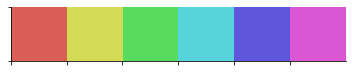

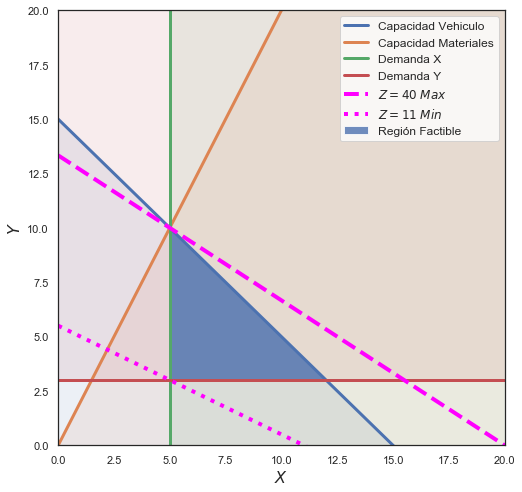

In [8]:
colores=sns.palplot(sns.color_palette("hls", ))
sns.set()
sns.set(style='white')
sns.despine()
sns.set_context('notebook')

# Crear un objeto gráfico.
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(0, 20)
y = np.linspace(0, 20)

# agregando la restricción de horas de capintería
plt.plot(x, 15 - x, lw=3, label='Capacidad Vehiculo')
plt.fill_between(x, 0, 15 - x, alpha=0.1)

# agregando la restricción de horas de acabado
plt.plot(x,2*x, lw=3, label='Capacidad Materiales')
plt.fill_between(x,2*x,0,alpha=0.1)

# agregando la restricción de demanda
plt.plot(5 * np.ones_like(x), x, lw=3, label='Demanda X')
plt.fill_betweenx(x, 5, 20, alpha=0.1)

# agregando la restricción de demanda
plt.plot(y, 3 * np.ones_like(y), lw=3, label='Demanda Y')
plt.fill_betweenx(y+3,  0, 20, alpha=0.1)


# Sobrear la región Factible.
path = Path([
    (5, 3),
    (5, 10),
    (12, 3)])
patch = PathPatch(path, label='Región Factible', alpha=0.8)
ax.add_patch(patch)


# agregando las funciones objetivo
plt.plot(x,(40/3) -(2/3) * x,color='magenta',linestyle='dashed',lw=4, label='$Z=40 \; Max$')
plt.plot(x, (11/2) -(1/2) * x,color='magenta',linestyle='dotted',lw=4, label='$Z=11 \; Min$')

plt.xlabel('$X$', fontsize=16)
plt.ylabel('$Y$', fontsize=16)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.legend(fontsize=12)

plt.show()

#  <font color= #007FFF> Paso nº 1: Metodo de $\varepsilon_i$-constraint utilizando **Cplex** </font>

<div class="alert alert-block alert-warning">

<b> **Cplex:**</b>  
Determinar la frontera de Pareto de soluciones para el problema utilizando el método de $\varepsilon_i$-constraint 
</div>

#### Model 1
$ Max \; f_1=2x+3y$

s.t

$x+y \leq 15$

$ y -2x \leq 0$

$x \geq 5$

$y \geq 3$

$x + 2y \leq \varepsilon_1$

In [9]:
# Upper Bound

mdl = Model('MDCM_1')
x = mdl.continuous_var(name='x')
y = mdl.continuous_var(name='y')
e1 = mdl.continuous_var(name='e1')

# MDCM_1 - Upper Bound
mdl.maximize(2*x +3*y)
mdl.add_constraint(x+y <= 15)
mdl.add_constraint(y-2*x <= 0)
mdl.add_constraint(x >= 5)
mdl.add_constraint(y >= 3)
mdl.add_constraint(x+2*y <=e1)

solucion = mdl.solve(log_output=False)
print("*****************")
print("Solución modelo 1")
solucion.display()

*****************
Solución modelo 1
solution for: MDCM_1
objective: 40.000
x = 5.000
y = 10.000
e1 = 25.000


In [10]:
max_f2=int(e1.solution_value)
max_f2

25

In [11]:
max_f1=int(solucion.objective_value)
max_f1

40

In [12]:
modelo = Model('MDCM_2')
x = modelo.continuous_var(name='x')
y = modelo.continuous_var(name='y')
e2 = modelo.continuous_var(name='e2')

modelo.minimize(x +2*y)
modelo.add_constraint(x+y <= 15)
modelo.add_constraint(y-2*x <= 0)
modelo.add_constraint(x >= 5)
modelo.add_constraint(y >= 3)
modelo.add_constraint(2*x +3*y <=e2)

solucion_2 = modelo.solve(log_output=False)
print("*****************")
print("Solución modelo 2")
solucion_2.display()

*****************
Solución modelo 2
solution for: MDCM_2
objective: 11.000
x = 5.000
y = 3.000
e2 = 19.000


In [13]:
min_f2=int(solucion_2.objective_value)
min_f2

11

In [14]:
min_f1=int(e2.solution_value)
min_f1

19

<div class="alert alert-block alert-warning">

<b> **Cplex:**</b> 
En las dos primera etapas obtenemos los limites mínimo **(lower bound)** y máximo **(upper bound)** de la variable $\varepsilon_i$.Luego resolvemos el modelo para todos o la mayoría de los valores de $\varepsilon_i$ </div>

In [15]:
# e comienza en 25 y temrina en 11.
list_x=[]
list_y=[]
f1=[]
f2=[]


for e in range(max_f2,min_f2,-1):
    model = Model('MDCM')
    x = model.continuous_var(name='x')
    y = model.continuous_var(name='y')
    
    model.maximize(2*x +3*y)
    model.add_constraint(x+y <= 15)
    model.add_constraint(y-2*x <= 0)
    model.add_constraint(x >= 5)
    model.add_constraint(y >= 3)
    model.add_constraint(x+2*y <=e)
    
    solution=model.solve(log_output=False)
    
    list_x.append(solution.get_value(x))
    list_y.append(solution.get_value(y))
    
    f1.append(solution.get_objective_value())
    f2.append(e)

In [16]:
print(f1)

[40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 31.0, 29.0, 27.0, 25.0, 23.0, 21.0]


In [17]:
print(f2)

[25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12]


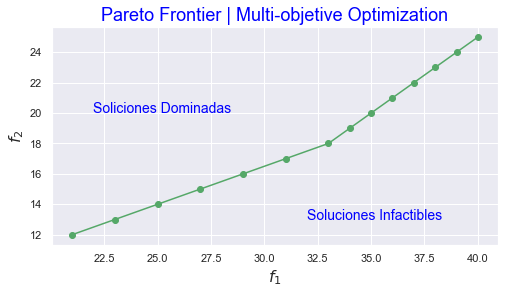

In [18]:
plt.figure(figsize=(8,4))

sns.set(style="darkgrid")
plt.plot(f1,f2,'o-',color='g')

plt.xlabel('$f_1$', fontsize=16)
plt.ylabel('$f_2$', fontsize=16)
plt.title("Pareto Frontier | Multi-objetive Optimization",fontsize=18,color='blue')

plt.text(22, 20, "Soliciones Dominadas", fontsize=14,color='blue')
plt.text(32, 13, "Soluciones Infactibles", fontsize=14,color='blue')

plt.show()

In [19]:
df=pd.DataFrame(list(zip(f1, f2, list_x,list_y)),columns=['$f_1$','$f_2$', 'x','y'])
df['$f_1$'] = df['$f_1$'].astype(int)
df

,$f_1$,$f_2$,x,y
0,40,25,5.0,10.0
1,39,24,6.0,9.0
2,38,23,7.0,8.0
3,37,22,8.0,7.0
4,36,21,9.0,6.0
5,35,20,10.0,5.0
6,34,19,11.0,4.0
7,33,18,12.0,3.0
8,31,17,11.0,3.0
9,29,16,10.0,3.0


#  <font color= #007FFF> Paso nº 2: Determinar el punto Utópico </font>

<div class="alert alert-success">

<b> **Cplex:**</b>  
Se determina el punto Utópico es decir el punto en el cual ambas funciones tendrían su valor óptimo. 
</div>

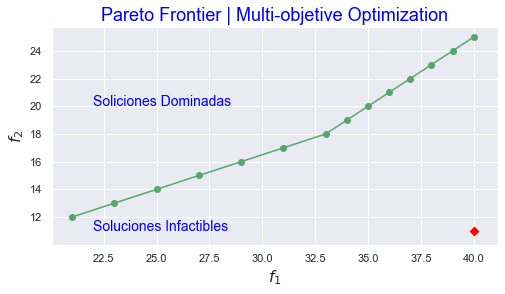

In [20]:
plt.figure(figsize=(8,4))

sns.set(style="darkgrid")
plt.plot(f1,f2,'o-',color='g')

plt.scatter(max_f1,min_f2,marker="D",color='red')

plt.xlabel('$f_1$', fontsize=16)
plt.ylabel('$f_2$', fontsize=16)
plt.title("Pareto Frontier | Multi-objetive Optimization",fontsize=18,color='blue')


plt.text(22, 20, "Soliciones Dominadas", fontsize=14,color='blue')
plt.text(22, 11, "Soluciones Infactibles", fontsize=14,color='blue')

plt.show()

#  <font color= #007FFF> Paso nº 3: Algoritmo de Compromise Programming. </font>

<div class="alert alert-success">

<b> **Cplex:**</b>  
Calcular la distancia entre el punto Utópico y las diferentes soluciones de que se encuentran en la frontera de pareto.
</div>

In [21]:
# variables y funciones:
w1=0.5
w2=0.5

def f1(x,y):
    return 2*x+3*y

def f2(x,y):
    return x+2*y

<div class="alert alert-danger">

<b> **Compromise Programing | P=1:**</b>  
Resolver el modelo utilizando el modelo de distancia con P=1
</div>

### <font color= #007FFF> Modelo de Programación Líneal | p=1. </font>

\begin{equation}
Min\;L_1=w_1 \frac{40-f_1(x)}{40-19}+w_2 \frac{f_2(x)-11}{25-11}
\\
s.t
\\
x+y \leq 15 
\\
y -2x \leq 0 
\\
x \geq 5 
\\
y \geq 3
\\
x,y \geq 0
\end{equation}

In [22]:
modelo = Model('MDCM_CP-P1')
x = modelo.continuous_var(name='x')
y = modelo.continuous_var(name='y')

modelo.minimize( w1*((40-f1(x,y))/(40-19))+w2*((f2(x,y)-11)/(25-11)))
modelo.add_constraint(x+y <= 15)
modelo.add_constraint(y-2*x <= 0)
modelo.add_constraint(x >= 5)
modelo.add_constraint(y >= 3)

solucion_CP_P1 = modelo.solve(log_output=False)
print("*****************")
print("Solución modelo 2")
solucion_CP_P1.display()

*****************
Solución modelo 2
solution for: MDCM_CP-P1
objective: 0.417
x = 12.000
y = 3.000


In [23]:
X_1=x.solution_value
Y_1=y.solution_value

f1_p1=f1(X_1,Y_1)
f2_p2=f2(X_1,Y_1)
print(" El valor de la función objetivo $f_1$ es: ",f1_p1)
print(" El valor de la función objetivo $f_2$ es: ",f2_p2)

 El valor de la función objetivo $f_1$ es:  33.0
 El valor de la función objetivo $f_2$ es:  18.0


<div class="alert alert-danger">

<b> **Compromise Programing | P= $\infty$:**</b>  
Resolver el modelo utilizando el modelo de distancia con P=$\infty$
</div>

### <font color= #007FFF> Modelo de Programación Líneal | p=$\infty$. </font>

\begin{equation}
Min\;L_\infty =d
\\
s.t
\\
x+y \leq 15 
\\
y -2x \leq 0 
\\
x \geq 5 
\\
y \geq 3
\\
w_1 \frac{40-f_1(x)}{40-19} \leq d
\\
w_2 \frac{f_2(x)-11}{25-11} \leq d
\\
x,y \geq 0
\end{equation}

In [24]:
modelo = Model('MDCM_CP-Pinf')
x = modelo.continuous_var(name='x')
y = modelo.continuous_var(name='y')
d = modelo.continuous_var(name='d')

modelo.minimize(d)
modelo.add_constraint(x+y <= 15)
modelo.add_constraint(y-2*x <= 0)
modelo.add_constraint(x >= 5)
modelo.add_constraint(y >= 3)
modelo.add_constraint(w1*((40-f1(x,y))/(40-19)) <= d)
modelo.add_constraint(w2*((f2(x,y)-11)/(25-11)) <= d)
solucion_CP_Pinf = modelo.solve(log_output=False)
print("*****************")
a='\infty'
print("Solución modelo P=",'$%s$'%a)
solucion_CP_Pinf.display()

*****************
Solución modelo P= $\infty$
solution for: MDCM_CP-Pinf
d: 0.214
x = 11.000
y = 3.000
d = 0.214


In [25]:
X_inf=x.solution_value
Y_inf=y.solution_value

f1_inf=f1(X_inf,Y_inf)
f2_inf=f2(X_inf,Y_inf)
print(" El valor de la función objetivo $f_1$ es: ",f1_inf)
print(" El valor de la función objetivo $f_2$ es: ",f2_inf)

 El valor de la función objetivo $f_1$ es:  31.0
 El valor de la función objetivo $f_2$ es:  17.0


### <font color= #007FFF>Gráficando soluciones. </font>

<div class="alert alert-warning">

<b> **Compromise Programing** </b>  
gráficando las dos soluciones – upper bound and lower bound – en la Frontera de Pareto.
</div>


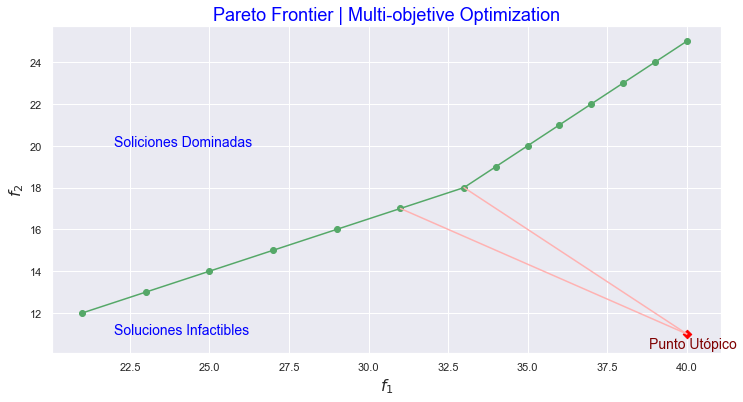

In [26]:
plt.figure(figsize=(12,6))
f_1=df['$f_1$']
f_2=df['$f_2$']

sns.set(style="darkgrid")
plt.plot(f_1,f_2,'o-',color='g')

plt.scatter(max_f1,min_f2,marker="D",color='red')

plt.xlabel('$f_1$', fontsize=16)
plt.ylabel('$f_2$', fontsize=16)
plt.title("Pareto Frontier | Multi-objetive Optimization",fontsize=18,color='blue')
plt.plot([max_f1,f1_inf],[min_f2,f2_inf],color="#ffb2b2")
plt.plot([max_f1,f1_p1],[min_f2,f2_p2],color="#ffb2b2")

plt.text(22, 20, "Soliciones Dominadas", fontsize=14,color='blue')
plt.text(22, 11, "Soluciones Infactibles", fontsize=14,color='blue')
plt.text(38.8, 10.3, "Punto Utópico", fontsize=14,color='#7f0000')

plt.show()

<pre>





</pre>      

<img src="logo_gurobi.png" width="400" height="400" />

#  <font color= #007FFF> Paso nº 1: Metodo de $\varepsilon_i$-constraint utilizando **Gurobi** </font>

<div class="alert alert-block alert-warning">

<b> **Cplex:**</b>  
Determinar la frontera de Pareto de soluciones para el problema utilizando el método de $\varepsilon_i$-constraint 
</div>

In [27]:
from gurobipy import *

In [28]:
# Primero resolver el problema de maximización:
model_1 = Model('ejemplo_1 - Gurobi')

x = model_1.addVar(vtype=GRB.CONTINUOUS, name='x')
y = model_1.addVar(vtype=GRB.CONTINUOUS, name='y')
e_1 = model_1.addVar(vtype=GRB.CONTINUOUS, name='e_1')

model_1.setObjective(2*x+3*y, GRB.MAXIMIZE)
model_1.addConstr(x+y<=15,"c1")
model_1.addConstr(-2*x+y<=0,"c2")
model_1.addConstr(x>=5,"c3")
model_1.addConstr(y>=3,"c4")
model_1.addConstr(x+2*y<=e_1,"ce")

model_1.optimize()
print("Función Objetivo ",model_1.ObjVal)

Academic license - for non-commercial use only
Optimize a model with 5 rows, 3 columns and 9 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 5 rows and 3 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.04 seconds
Optimal objective  4.000000000e+01
Función Objetivo  40.0


In [29]:
sol_var_1 = [x.x,y.x,e_1.x]
sol_var_1

[5.0, 10.0, 25.0]

In [30]:
f1_max=int(model_1.ObjVal)
f1_max

40

In [31]:
f2_max=int(e_1.x)
f2_max

25

In [32]:
# Primero resolver el problema de maximización:
model_2 = Model('ejemplo_2 - Gurobi')

x = model_2.addVar(vtype=GRB.CONTINUOUS, name='x')
y = model_2.addVar(vtype=GRB.CONTINUOUS, name='y')
e_2 = model_2.addVar(vtype=GRB.CONTINUOUS, name='e_2')

model_2.setObjective(x+2*y, GRB.MINIMIZE)
model_2.addConstr(x+y<=15,"c1")
model_2.addConstr(-2*x+y<=0,"c2")
model_2.addConstr(x>=5,"c3")
model_2.addConstr(y>=3,"c4")
model_2.addConstr(2*x+3*y<=e_2,"ce")

model_2.optimize()
print("Función Objetivo ",model_2.ObjVal)

Optimize a model with 5 rows, 3 columns and 9 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 5 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.1000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds
Optimal objective  1.100000000e+01
Función Objetivo  11.0


In [33]:
sol_var_2 = [x.x,y.x,e_2.x]
sol_var_2

[5.0, 3.0, 19.0]

In [34]:
f2_min=int(model_2.ObjVal)
f2_min

11

In [35]:
f1_min=int(e_2.x)
f1_min

19

In [36]:
# e comienza en 25 y temrina en 11.
list_x=[]
list_y=[]
f1=[]
f2=[]


for e in range(f2_max,f2_min,-1):
    model_e = Model('Pareto Frontier - Gurobi')
    model_e.setParam('OutputFlag', 0)

    x = model_e.addVar(vtype=GRB.CONTINUOUS, name='x')
    y = model_e.addVar(vtype=GRB.CONTINUOUS, name='y')
    
    model_e.setObjective(2*x+3*y, GRB.MAXIMIZE)
    model_e.addConstr(x+y<=15,"c1")
    model_e.addConstr(-2*x+y<=0,"c2")
    model_e.addConstr(x>=5,"c3")
    model_e.addConstr(y>=3,"c4")
    model_e.addConstr(x+2*y<=e,"ce")

    model_e.optimize()
    
    list_x.append(x.x)
    list_y.append(y.x)
    
    f1.append(model_e.ObjVal)
    f2.append(e)

In [37]:
df=pd.DataFrame(list(zip(f1, f2, list_x,list_y)),columns=['$f_1$','$f_2$', 'x','y'])
df['$f_1$'] = df['$f_1$'].astype(int)
df

,$f_1$,$f_2$,x,y
0,40,25,5.0,10.0
1,39,24,6.0,9.0
2,38,23,7.0,8.0
3,37,22,8.0,7.0
4,36,21,9.0,6.0
5,35,20,10.0,5.0
6,34,19,11.0,4.0
7,33,18,12.0,3.0
8,31,17,11.0,3.0
9,29,16,10.0,3.0


#  <font color= #007FFF> Paso nº 2: Determinar el punto Utópico </font>

<div class="alert alert-success">

<b> **Gurobi:**</b>  
Se determina el punto Utópico es decir el punto en el cual ambas funciones tendrían su valor óptimo. 
</div>

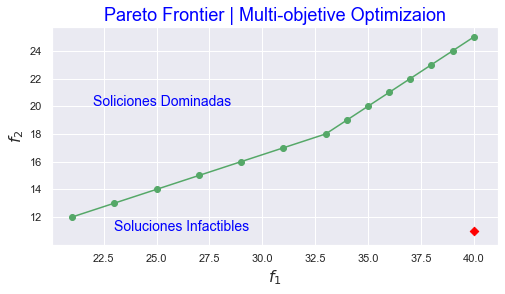

In [38]:
plt.figure(figsize=(8,4))

sns.set(style="darkgrid")
plt.plot(f1,f2,'o-',color='g')

plt.xlabel('$f_1$', fontsize=16)
plt.ylabel('$f_2$', fontsize=16)
plt.title("Pareto Frontier | Multi-objetive Optimizaion",fontsize=18,color='blue')
plt.scatter(f1_max,f2_min,marker="D",color='red')


plt.text(22, 20, "Soliciones Dominadas", fontsize=14,color='blue')
plt.text(23, 11, "Soluciones Infactibles", fontsize=14,color='blue')

plt.show()

#  <font color= #007FFF> Paso nº 3: Algoritmo de Compromise Programming. </font>

<div class="alert alert-success">

<b> **Gurobi:**</b>  
Calcular la distancia entre el punto Utópico y las diferentes soluciones de que se encuentran en la frontera de pareto.
</div>

In [39]:
# variables y funciones:
w1=0.5
w2=0.5

def f1(x,y):
    return 2*x+3*y

def f2(x,y):
    return x+2*y

<div class="alert alert-danger">

<b> **Compromise Programing | P=1:**</b>  
Resolver el modelo utilizando el modelo de distancia con P=1
</div>

### <font color= #007FFF> Modelo de Programación Líneal | p=1. </font>

\begin{equation}
Min\;L_1=w_1 \frac{40-f_1(x)}{40-19}+w_2 \frac{f_2(x)-11}{25-11}
\\
s.t
\\
x+y \leq 15 
\\
y -2x \leq 0 
\\
x \geq 5 
\\
y \geq 3
\\
x,y \geq 0
\end{equation}

In [40]:
# Primero resolver el problema:
model_p1 = Model('Muliobj - Gurobi')

x = model_p1.addVar(vtype=GRB.CONTINUOUS, name='x')
y = model_p1.addVar(vtype=GRB.CONTINUOUS, name='y')
model_p1.setObjective(w1*((40-f1(x,y))/(40-19))+w2*((f2(x,y)-11)/(25-11)), GRB.MINIMIZE)
model_p1.addConstr(x+y<=15,"c1")
model_p1.addConstr(-2*x+y<=0,"c2")
model_p1.addConstr(x>=5,"c3")
model_p1.addConstr(y>=3,"c4")

model_p1.optimize()
print("Función Objetivo ",model_p1.ObjVal)

Optimize a model with 4 rows, 2 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e-02, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 2e+01]
Presolve removed 4 rows and 2 columns
Presolve time: 0.04s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.1666667e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.06 seconds
Optimal objective  4.166666667e-01
Función Objetivo  0.4166666666666667


In [41]:
sol_var_p1 = [x.x,y.x]

f1_p1=f1(sol_var_p1[0],sol_var_p1[1])
f2_p2=f2(sol_var_p1[0],sol_var_p1[1])
print(" El valor de la función objetivo $f_1$ es: ",f1_p1)
print(" El valor de la función objetivo $f_2$ es: ",f2_p2)

 El valor de la función objetivo $f_1$ es:  33.0
 El valor de la función objetivo $f_2$ es:  18.0


<div class="alert alert-danger">

<b> **Compromise Programing | P= $\infty$:**</b>  
Resolver el modelo utilizando el modelo de distancia con P=$\infty$
</div>

### <font color= #007FFF> Modelo de Programación Líneal | p=$\infty$. </font>

\begin{equation}
Min\;L_\infty =d
\\
s.t
\\
x+y \leq 15 
\\
y -2x \leq 0 
\\
x \geq 5 
\\
y \geq 3
\\
w_1 \frac{40-f_1(x)}{40-19} \leq d
\\
w_2 \frac{f_2(x)-11}{25-11} \leq d
\\
x,y \geq 0
\end{equation}

In [42]:
# Primero resolver el problema:
model_pinf = Model('Muliobj - Gurobi')

x = model_pinf.addVar(vtype=GRB.CONTINUOUS, name='x')
y = model_pinf.addVar(vtype=GRB.CONTINUOUS, name='y')
d = model_pinf.addVar(vtype=GRB.CONTINUOUS, name='d')

model_pinf.setObjective(d, GRB.MINIMIZE)
model_pinf.addConstr(x+y<=15,"c1")
model_pinf.addConstr(-2*x+y<=0,"c2")
model_pinf.addConstr(x>=5,"c3")
model_pinf.addConstr(y>=3,"c4")
model_pinf.addConstr(w1*((40-f1(x,y))/(40-19))<=d,"c5")
model_pinf.addConstr(w2*((f2(x,y)-11)/(25-11))<=d,"c6")

model_pinf.optimize()
print("Función Objetivo ",model_pinf.ObjVal)

Optimize a model with 6 rows, 3 columns and 12 nonzeros
Coefficient statistics:
  Matrix range     [4e-02, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-01, 2e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.04s
Presolved: 4 rows, 3 columns, 10 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.000000e-01   0.000000e+00      0s
       3    2.1428571e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.06 seconds
Optimal objective  2.142857143e-01
Función Objetivo  0.21428571428571427


In [43]:
sol_var_pinf = [x.x,y.x]

f1_inf=f1(sol_var_pinf[0],sol_var_pinf[1])
f2_inf=f2(sol_var_pinf[0],sol_var_pinf[1])
print(" El valor de la función objetivo $f_1$ es: ",f1_inf)
print(" El valor de la función objetivo $f_2$ es: ",f2_inf)

 El valor de la función objetivo $f_1$ es:  31.0
 El valor de la función objetivo $f_2$ es:  17.0


### <font color= #007FFF>Gráficando soluciones. </font>

<div class="alert alert-warning">

<b> **Compromise Programing** </b>  
gráficando las dos soluciones – upper bound and lower bound – en la Frontera de Pareto.
</div>



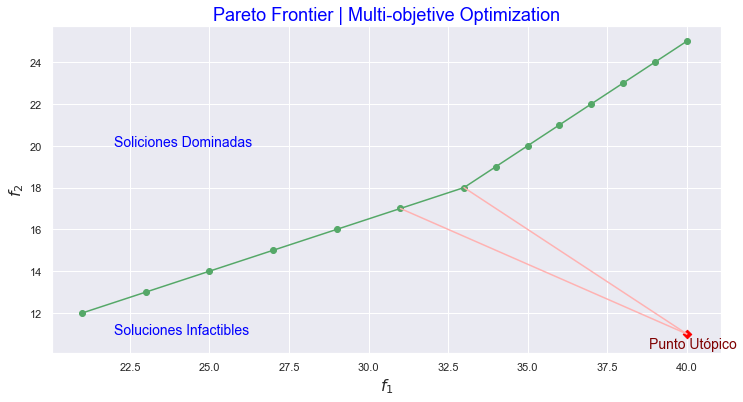

In [44]:
plt.figure(figsize=(12,6))
f_1=df['$f_1$']
f_2=df['$f_2$']

sns.set(style="darkgrid")
plt.plot(f_1,f_2,'o-',color='g')

plt.scatter(f1_max,f2_min,marker="D",color='red')

plt.xlabel('$f_1$', fontsize=16)
plt.ylabel('$f_2$', fontsize=16)
plt.title("Pareto Frontier | Multi-objetive Optimization",fontsize=18,color='blue')
plt.plot([max_f1,f1_inf],[min_f2,f2_inf],color="#ffb2b2")
plt.plot([max_f1,f1_p1],[min_f2,f2_p2],color="#ffb2b2")

plt.text(22, 20, "Soliciones Dominadas", fontsize=14,color='blue')
plt.text(22, 11, "Soluciones Infactibles", fontsize=14,color='blue')
plt.text(38.8, 10.3, "Punto Utópico", fontsize=14,color='#7f0000')

plt.show()